In [ ]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment-1/WHR-2024-5CS037.csv")

In [ ]:
# 1. Data Exploration and Understanding
## 1.1 Dataset Overview
# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Identify the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows+1}, Number of columns: {num_columns}")

Number of rows: 144, Number of columns: 9


In [ ]:
# List all columns and their data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


# 1.2 Basic Statistics

In [ ]:

# Calculate mean, median, and standard deviation for the Score column
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()
print(f"Mean of Score: {score_mean}, Median of Score: {score_median}, Standard Deviation of Score: {score_std}")

Mean of Score: 5.52758041958042, Median of Score: 5.785, Standard Deviation of Score: 1.1707165099442995


In [ ]:
# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax()]['Country name']
lowest_score_country = df.loc[df['score'].idxmin()]['Country name']
print(f"Country with the highest score: {highest_score_country}")
print(f"Country with the lowest score: {lowest_score_country}")

Country with the highest score: Finland
Country with the lowest score: Afghanistan


In [ ]:
## 1.3 Missing Values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
## 1.4 Filtering and Sorting
# Filter countries with Score > 7.5
high_score_countries = df[df['score'] > 7.5]
print("Countries with Score greater than 7.5:")
high_score_countries

Countries with Score greater than 7.5:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows
sorted_high_score = high_score_countries.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("Top 10 countries with Score > 7.5 sorted by GDP per Capita:")
sorted_high_score

Top 10 countries with Score > 7.5 sorted by GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
## 1.5 Adding New Columns
# Create a new column for Happiness Category
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("Dataset with new Happiness Category column:")
df.head(10)

Dataset with new Happiness Category column:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586,High
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540,High
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488,High
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745,High


<ipython-input-18-575c0a903245>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='score', x='Country name', data=happiest_countries, dodge=False, palette='viridis', legend=False)


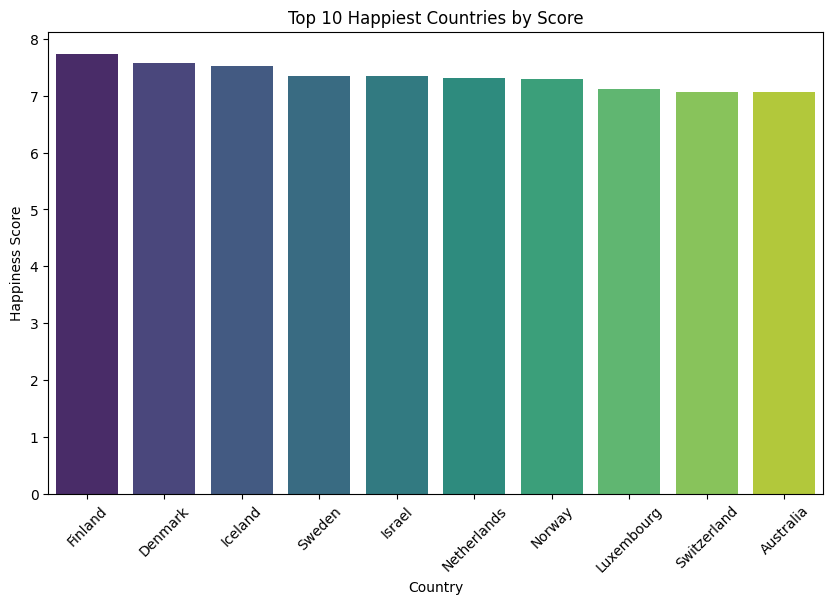

In [ ]:
# 2. Data Visualizations
## 2.1 Bar Plot for Top 10 Happiest Countries
happiest_countries = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='score', x='Country name', data=happiest_countries, dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Happiest Countries by Score')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

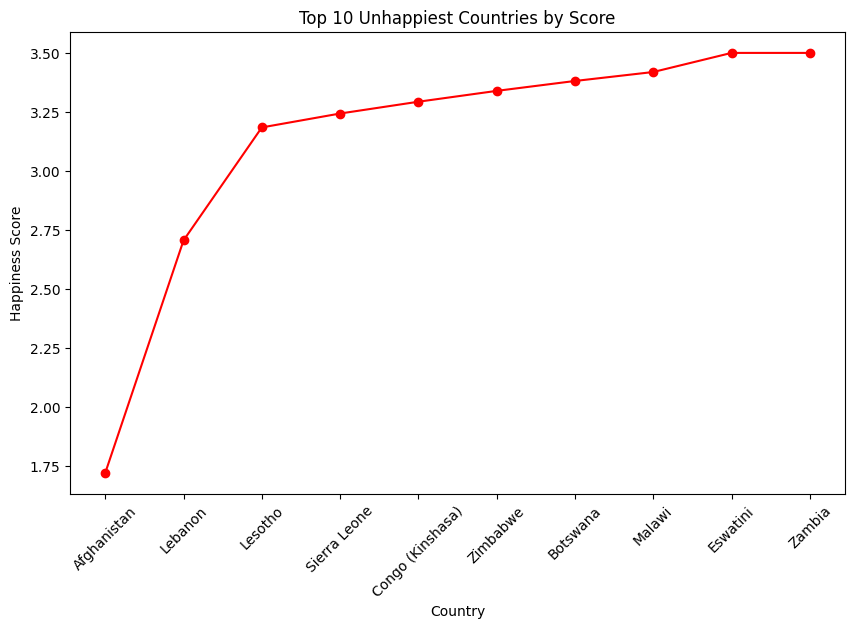

In [ ]:
## 2.2 Line Plot for Top 10 Unhappiest Countries
unhappiest_countries = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

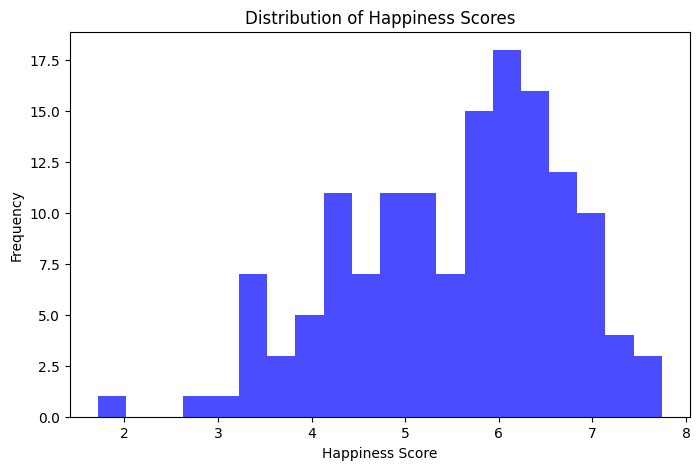

In [ ]:
## 2.3 Histogram for Score Column
plt.figure(figsize=(8, 5))
plt.hist(df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


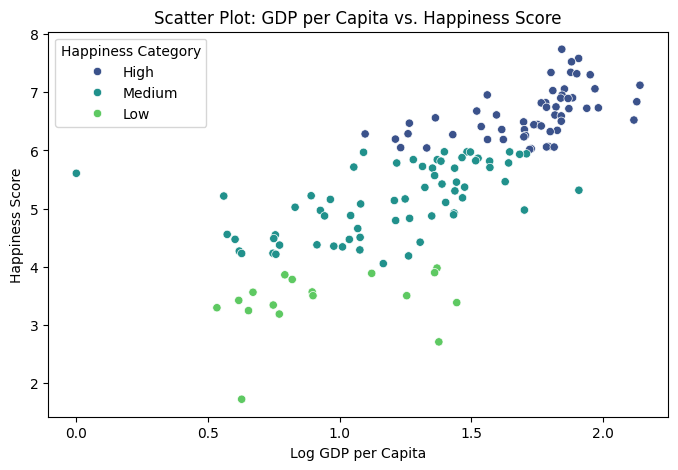

In [ ]:
## 2.4 Scatter Plot between GDP per Capita and Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='viridis')
plt.title('Scatter Plot: GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

# **Problem 2**

In [ ]:
## Task 1: Preparing the South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
# Save the South Asia dataset to a CSV file
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)
print("South Asia dataset saved to 'South_Asia_Happiness.csv'")


South Asia dataset saved to 'South_Asia_Happiness.csv'


In [ ]:
## Task 2: Composite Score Ranking
# Calculate Composite Score
south_asia_df['Composite Score'] = 0.4 * south_asia_df['Log GDP per capita'] + 0.3 * south_asia_df['Social support'] + 0.3 * south_asia_df['Healthy life expectancy']
# Rank countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("South Asian countries ranked by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']])

South Asian countries ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-14-55a8b5e1c2dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = 0.4 * south_asia_df['Log GDP per capita'] + 0.3 * south_asia_df['Social support'] + 0.3 * south_asia_df['Healthy life expectancy']


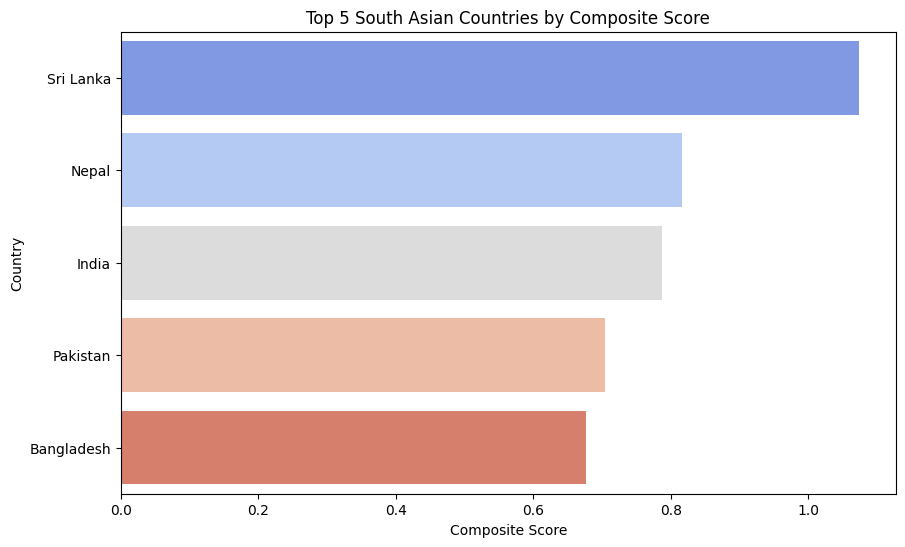

In [ ]:
# Visualize the top 5 countries by Composite Score
top_5_composite = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, hue='Country name', dodge=False, palette='coolwarm', legend=False)
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


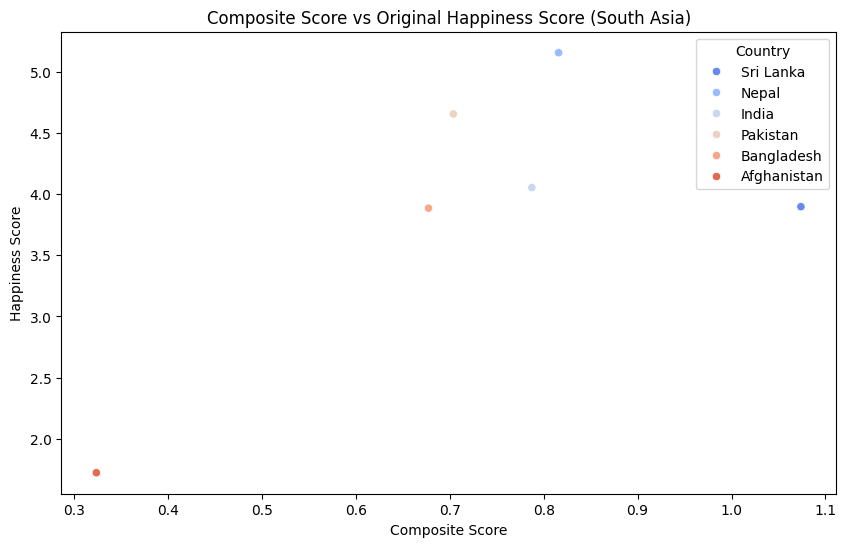

In [ ]:
# Discuss alignment with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_df, hue='Country name', palette='coolwarm')
plt.title('Composite Score vs Original Happiness Score (South Asia)')
plt.xlabel('Composite Score')
plt.ylabel('Happiness Score')
plt.legend(title='Country')
plt.show()

In [ ]:
## Task 3: Outlier Detection
# Define outliers using 1.5 * IQR rule
def find_outliers(column):
    Q1 = south_asia_df[column].quantile(0.25)
    Q3 = south_asia_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia_df[(south_asia_df[column] < lower_bound) | (south_asia_df[column] > upper_bound)]

outliers_score = find_outliers('score')
print("Outliers based on Happiness Score:")
outliers_score


Outliers based on Happiness Score:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


In [ ]:
outliers_gdp = find_outliers('Log GDP per capita')
print("Outliers based on GDP per Capita:")
outliers_gdp

Outliers based on GDP per Capita:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


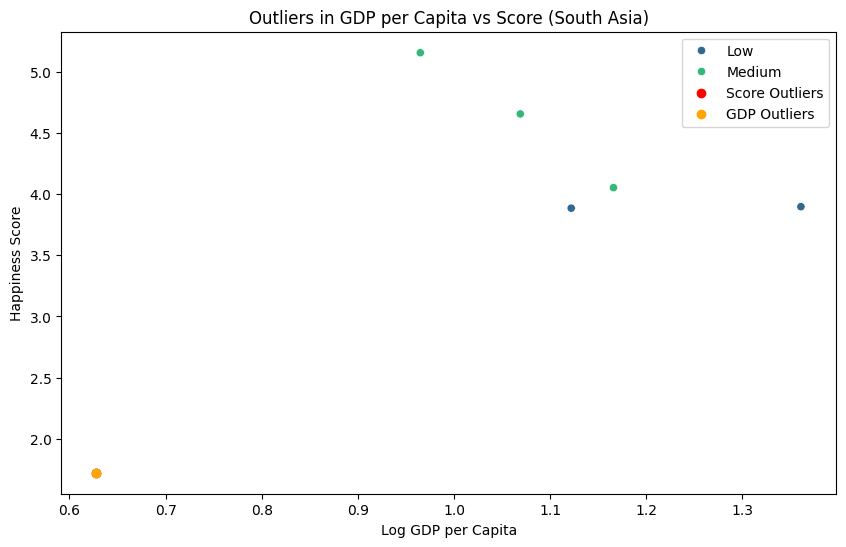

In [ ]:
# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue='Happiness Category', palette='viridis', legend='full')
plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'], color='red', label='Score Outliers')
plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'], color='orange', label='GDP Outliers')
plt.title('Outliers in GDP per Capita vs Score (South Asia)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

In [ ]:
## Task 4: Exploring Trends Across Metrics
# Calculate correlations
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])
print(f"Correlation of Freedom with Score: {freedom_corr}")
print(f"Correlation of Generosity with Score: {generosity_corr}")

Correlation of Freedom with Score: 0.8005185224163315
Correlation of Generosity with Score: 0.874512371253192


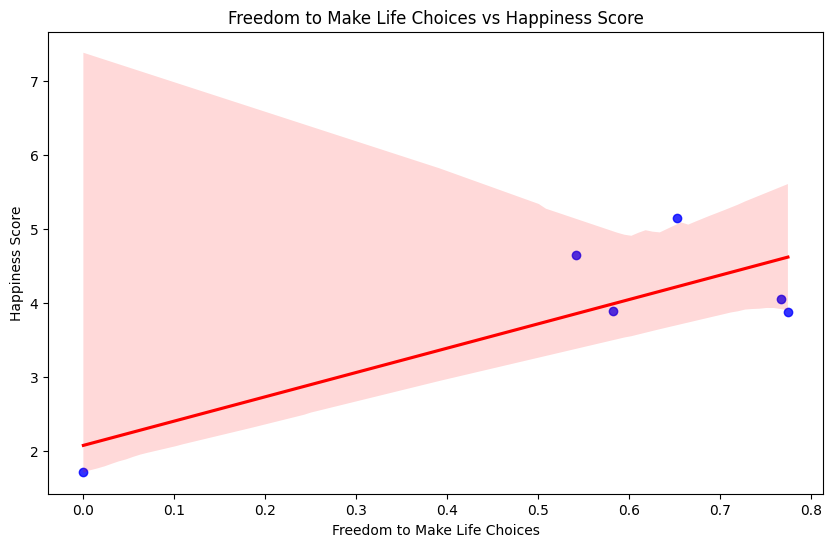

In [ ]:
# Scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

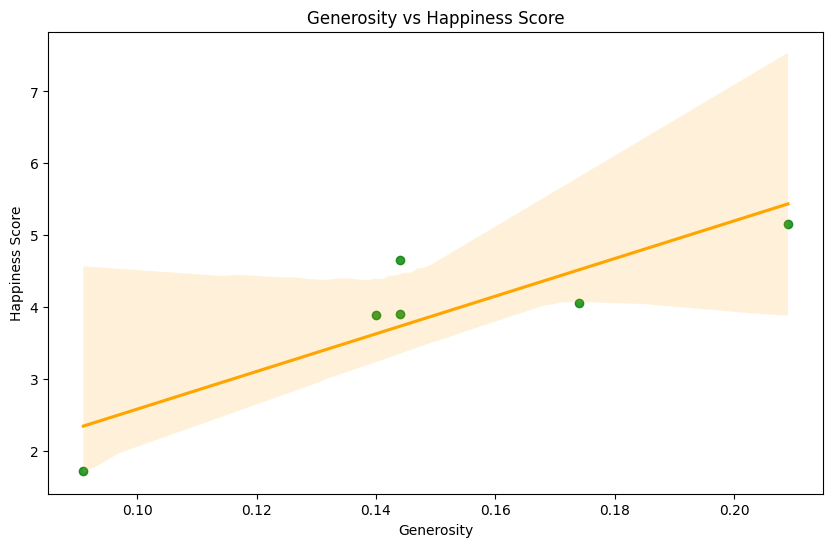

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

In [ ]:
## Task 5: Gap Analysis
# Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

In [ ]:
# Rank by GDP-Score Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

In [ ]:
print("Top 3 countries with largest negative GDP-Score Gaps:")
ascending_gap.head(3)


Top 3 countries with largest negative GDP-Score Gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


In [ ]:
print("Top 3 countries with largest positive GDP-Score Gaps:")
descending_gap.head(3)

Top 3 countries with largest positive GDP-Score Gaps:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


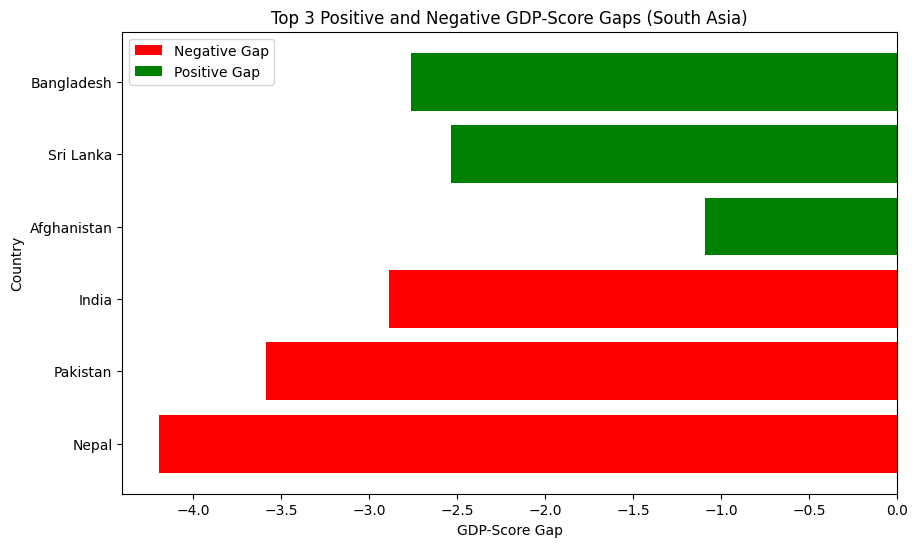

In [ ]:
# Visualize top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
plt.barh(ascending_gap['Country name'].head(3), ascending_gap['GDP-Score Gap'].head(3), color='red', label='Negative Gap')
plt.barh(descending_gap['Country name'].head(3), descending_gap['GDP-Score Gap'].head(3), color='green', label='Positive Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps (South Asia)')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

# **Problem 3**

In [ ]:
# Problem 3 - Comparative Analysis
## Task 1: Preparing the Middle Eastern Dataset
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]
# Save the Middle East dataset to a CSV file
middle_east_df.to_csv("Middle_East_Happiness.csv", index=False)
print("Middle East dataset saved to 'Middle_East_Happiness.csv'")

Middle East dataset saved to 'Middle_East_Happiness.csv'


In [ ]:
## Task 2: Descriptive Statistics
# Calculate mean and standard deviation for Score
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

In [ ]:
print(f"South Asia - Mean: {south_asia_mean}, Standard Deviation: {south_asia_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144


In [ ]:
if south_asia_mean > middle_east_mean:
    print("South Asia has higher average happiness scores.")
else:
    print("Middle East has higher average happiness scores.")

Middle East has higher average happiness scores.


In [ ]:
## Task 3: Top and Bottom Performers
# Identify top 3 and bottom 3 countries for each region
top_3_south_asia = south_asia_df.nlargest(3, 'score')
top_3_south_asia

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,0.7874


In [ ]:
top_3_middle_east = middle_east_df.nlargest(3, 'score')
top_3_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [ ]:
bottom_3_middle_east = middle_east_df.nsmallest(3, 'score')
bottom_3_middle_east

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium


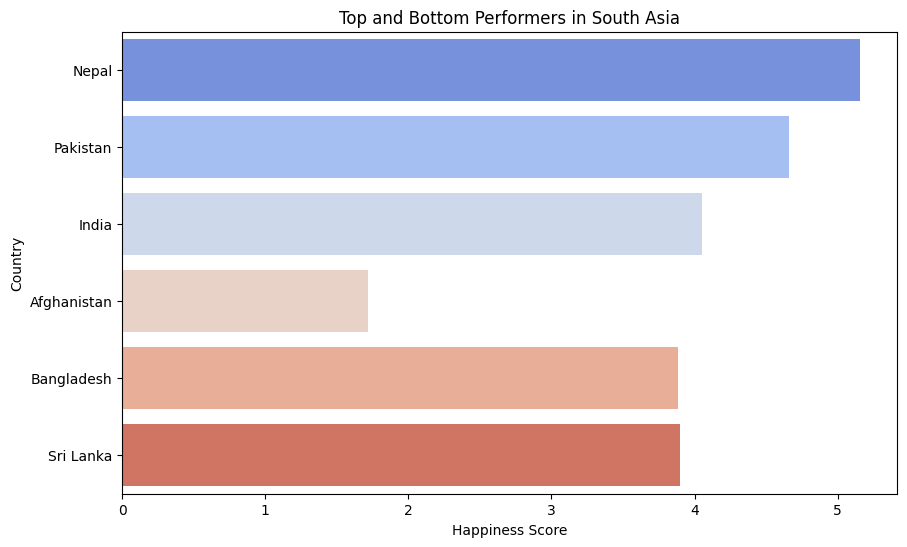

In [ ]:
# Plot bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', hue='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), dodge=False, palette='coolwarm', legend=False)
plt.title('Top and Bottom Performers in South Asia')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

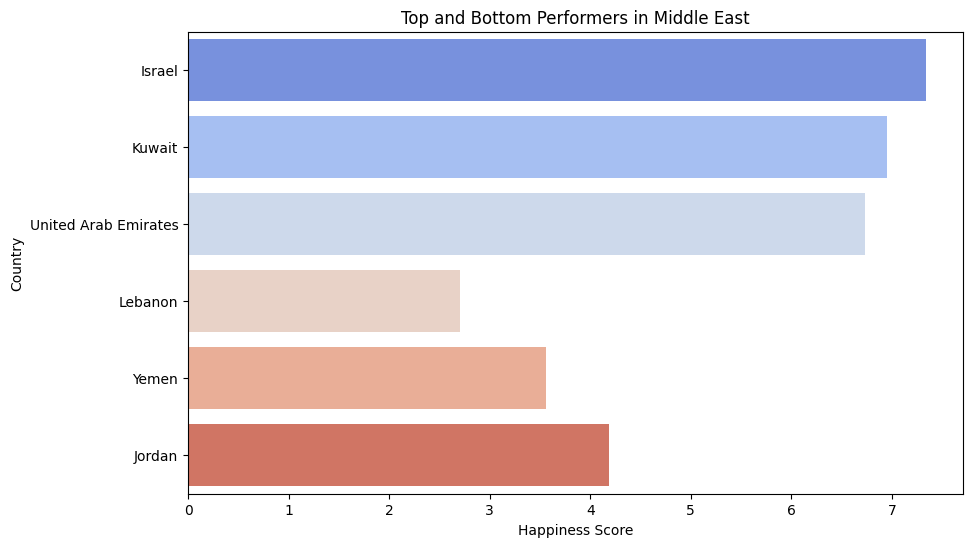

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', hue='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), dodge=False, palette='coolwarm', legend=False)
plt.title('Top and Bottom Performers in Middle East')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

In [ ]:
## Task 4: Metric Comparisons
# Compare GDP per Capita, Social Support, Healthy Life Expectancy
grouped_metrics = pd.concat([
    south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].assign(Region='South Asia'),
    middle_east_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].assign(Region='Middle East')
])

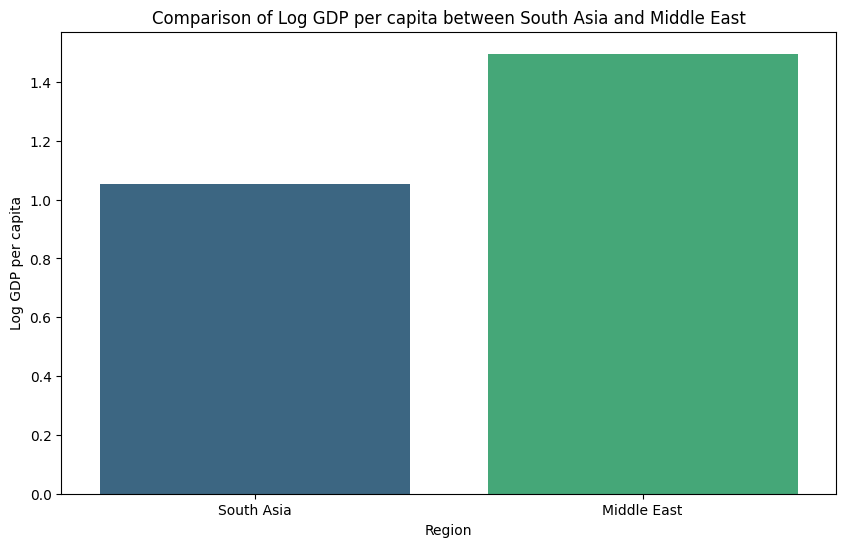

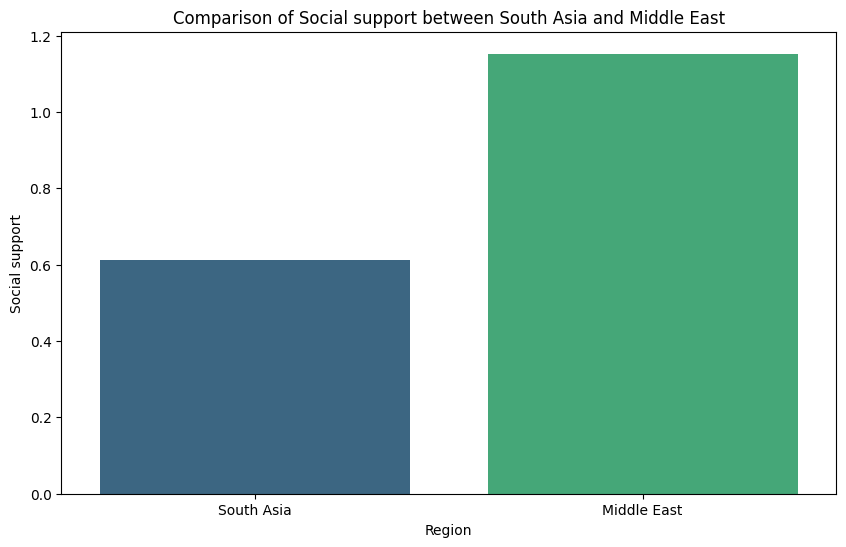

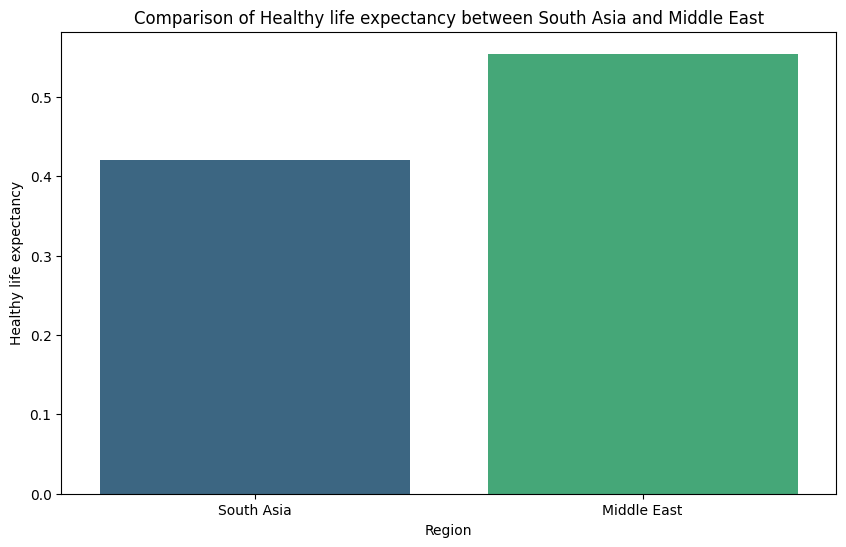

In [ ]:
# Plot grouped bar charts
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Region', y=metric, data=grouped_metrics, errorbar=None, hue='Region', dodge=False, palette='viridis', legend=False)
    plt.title(f'Comparison of {metric} between South Asia and Middle East')
    plt.xlabel('Region')
    plt.ylabel(metric)
    plt.show()

In [ ]:
## Task 5: Happiness Disparity
# Calculate range and coefficient of variation
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

In [ ]:
print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")

South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.30214828833374263


In [ ]:
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")

Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405


In [ ]:
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")


South Asia has greater variability in happiness scores.


South Asia - Correlation of Freedom: 0.8005185224163315, Generosity: 0.874512371253192


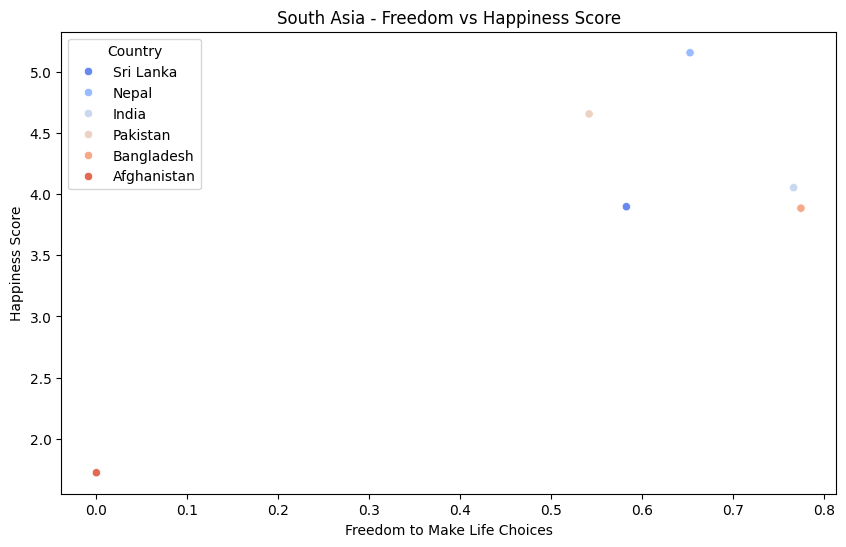

Middle East - Correlation of Freedom: 0.8632202433827543, Generosity: 0.6275236536964182


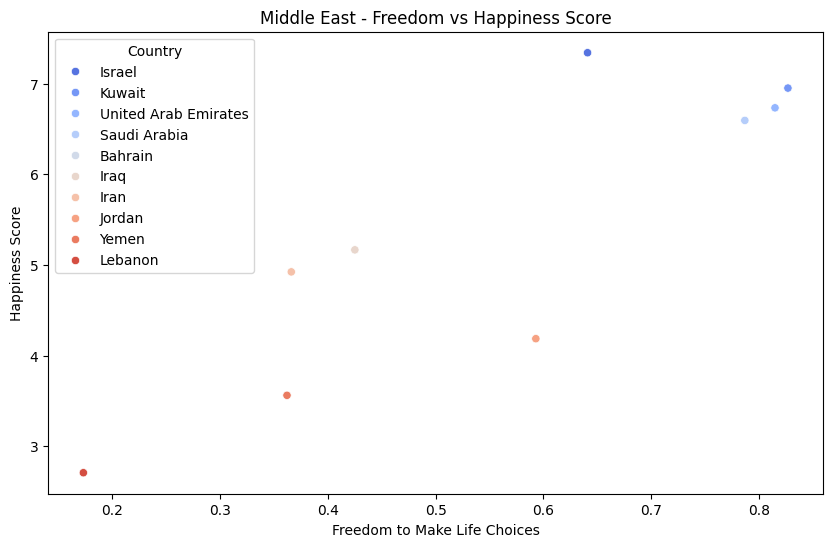

In [ ]:
## Task 6: Correlation Analysis
# Correlation of Score with Freedom and Generosity
for region, region_df in zip(['South Asia', 'Middle East'], [south_asia_df, middle_east_df]):
    freedom_corr = region_df['Freedom to make life choices'].corr(region_df['score'])
    generosity_corr = region_df['Generosity'].corr(region_df['score'])
    print(f"{region} - Correlation of Freedom: {freedom_corr}, Generosity: {generosity_corr}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Freedom to make life choices', y='score', data=region_df, hue='Country name', palette='coolwarm')
    plt.title(f'{region} - Freedom vs Happiness Score')
    plt.xlabel('Freedom to Make Life Choices')
    plt.ylabel('Happiness Score')
    plt.legend(title='Country')
    plt.show()

    plt.figure
